In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

Date: 2024-07-18
Merlin data for 2024-07-18: 4938 records
Baseline data for 2024-07-18: 6321 records
Merlin Condition: Engine On, Insulation: No
Baseline Condition: Engine On, Insulation: No
Conditions matched, plotting the data.


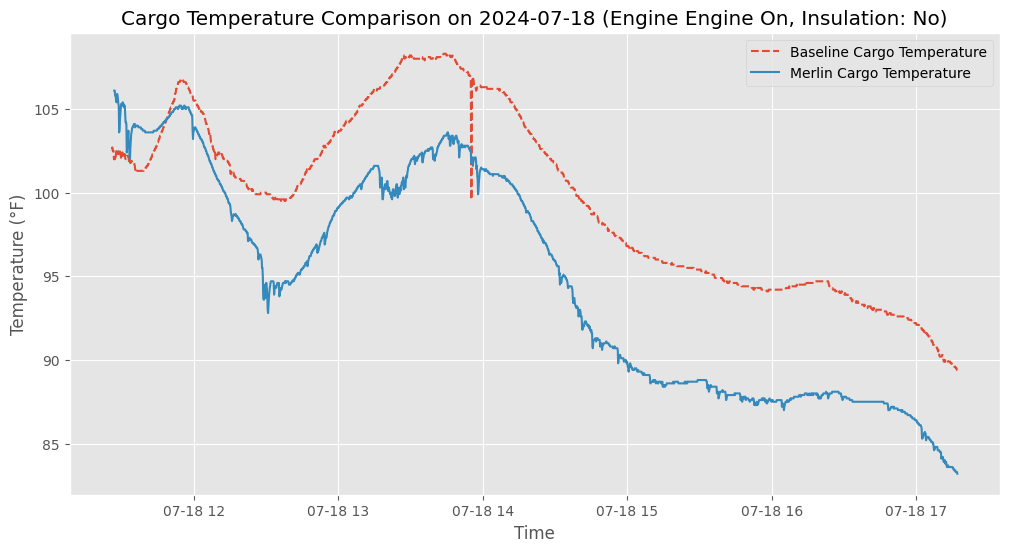

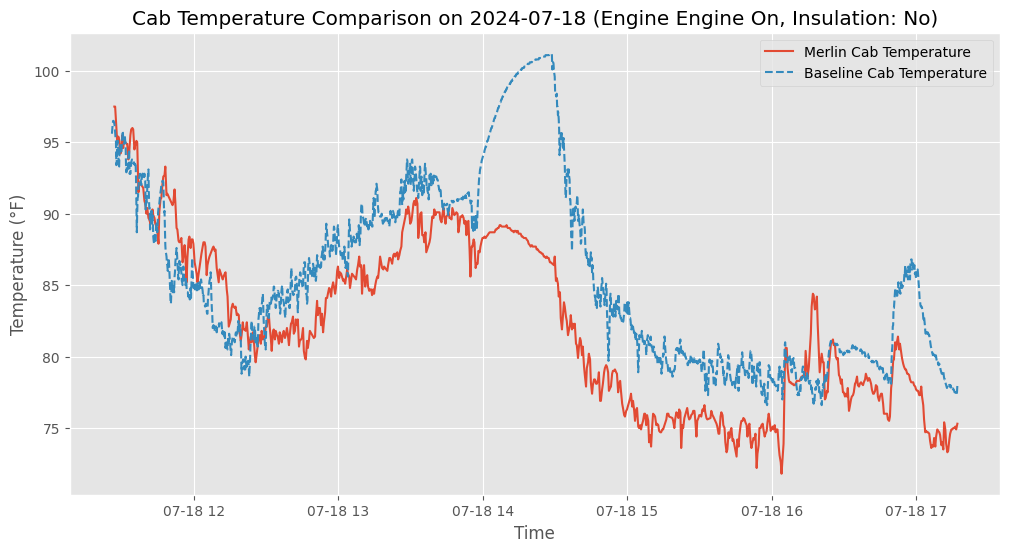

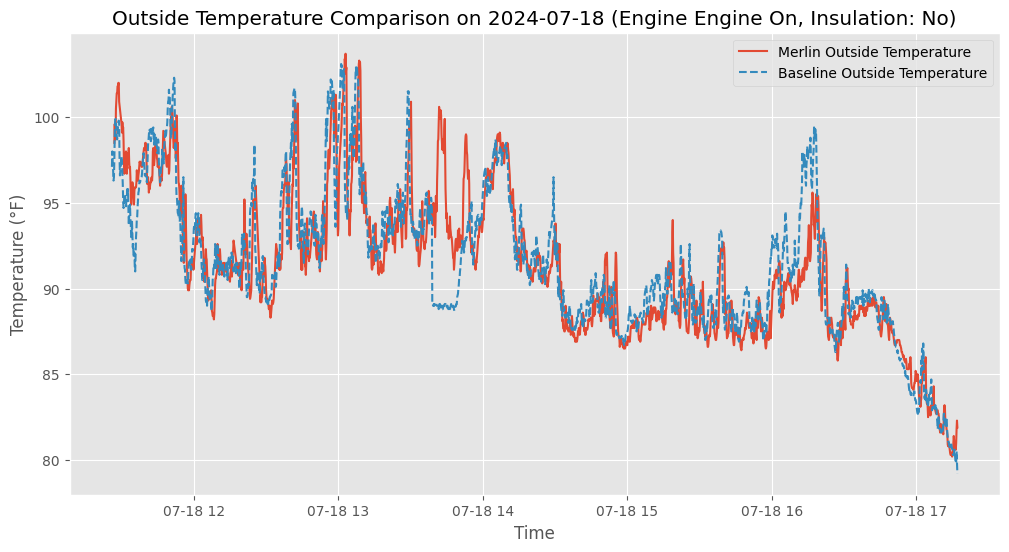

Date: 2024-07-19
Merlin data for 2024-07-19: 5794 records
Baseline data for 2024-07-19: 5922 records
Merlin Condition: Engine Off, Insulation: No
Baseline Condition: Engine Off, Insulation: No
Conditions matched, plotting the data.


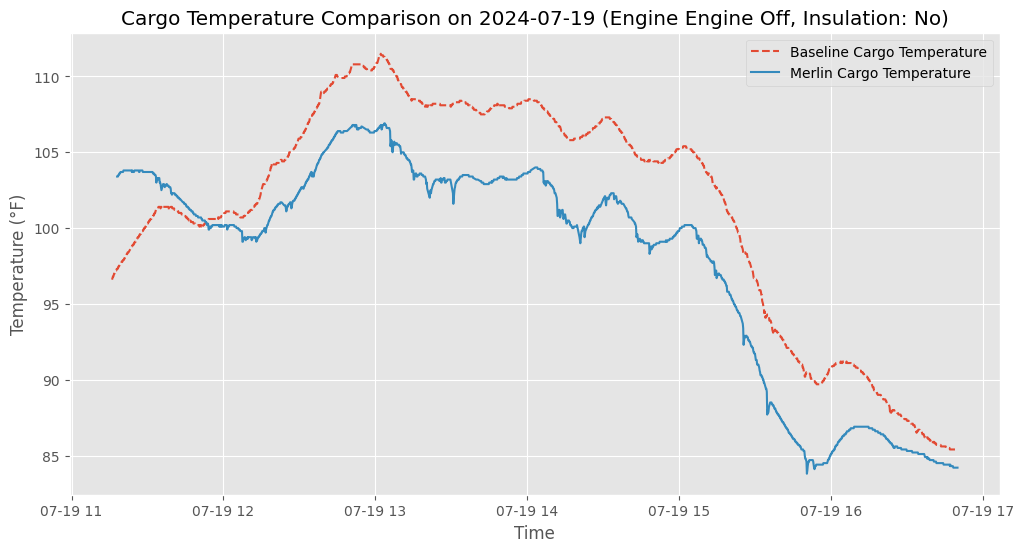

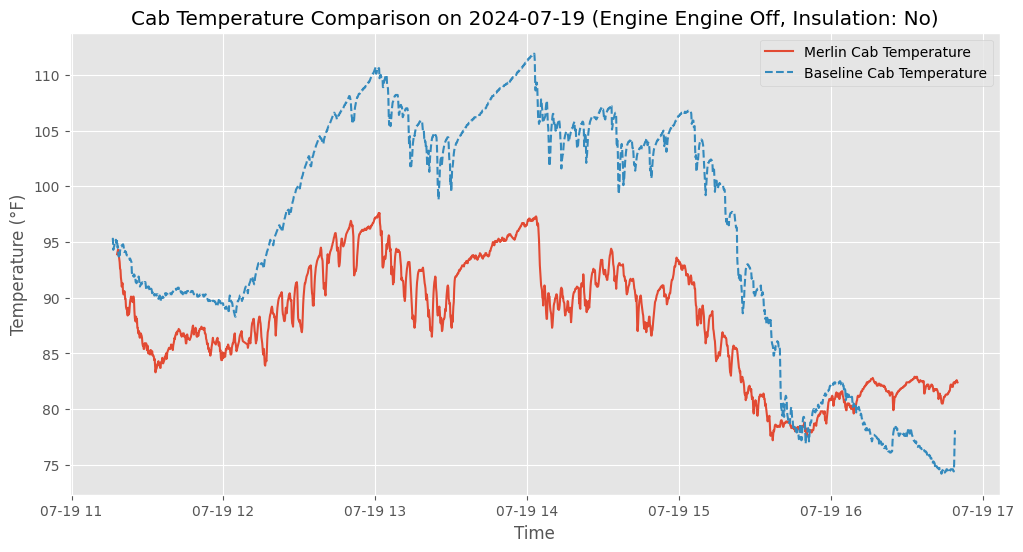

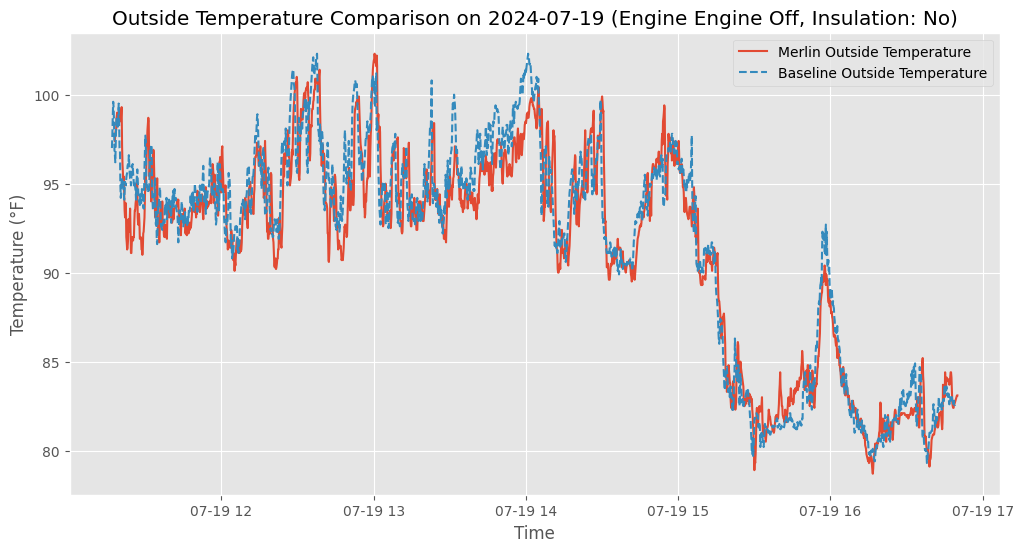

Date: 2024-07-23
Merlin data for 2024-07-23: 7903 records
Baseline data for 2024-07-23: 8233 records
Merlin Condition: Engine On, Insulation: No
Baseline Condition: Engine On, Insulation: No
Conditions matched, plotting the data.


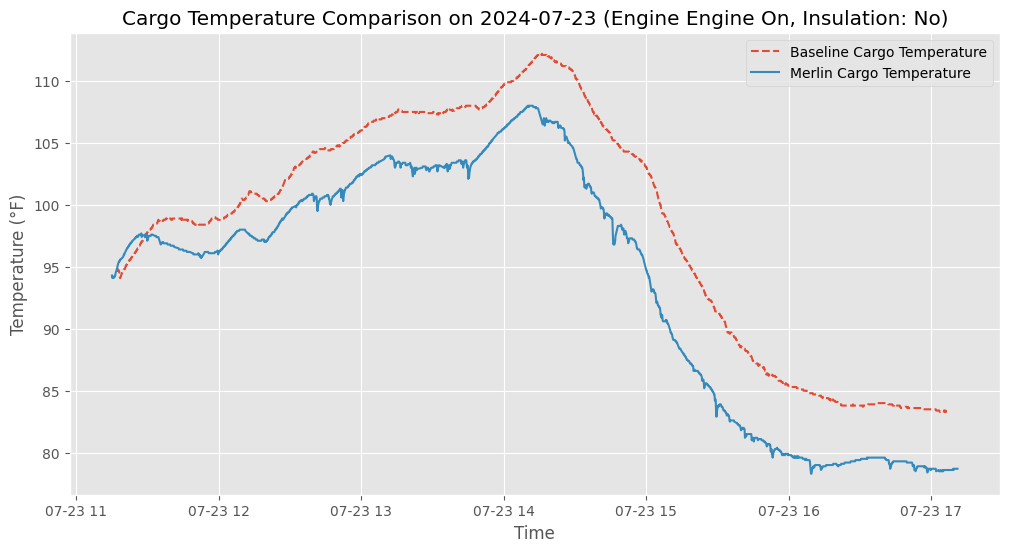

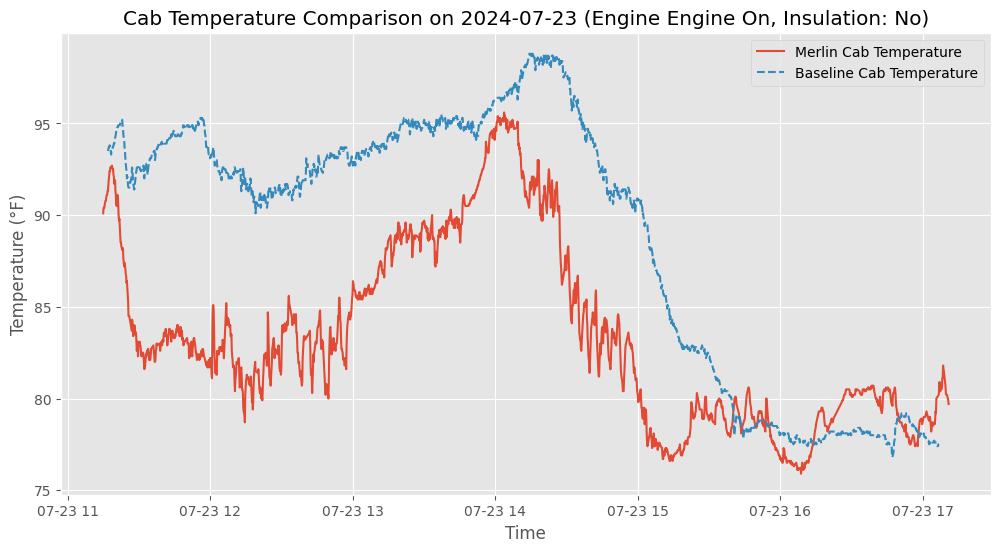

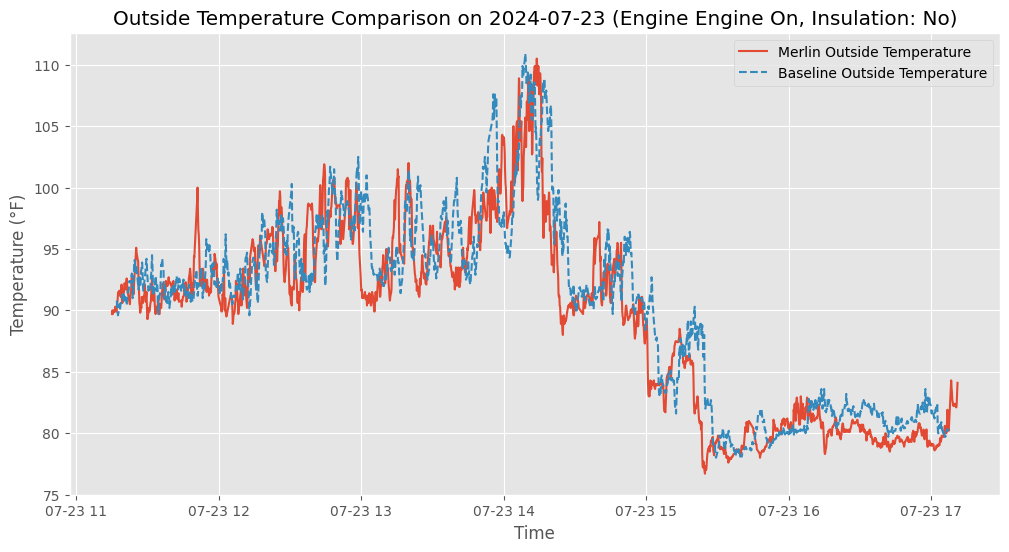

Date: 2024-07-24
Merlin data for 2024-07-24: 7922 records
Baseline data for 2024-07-24: 8202 records
Merlin Condition: Engine Off, Insulation: No
Baseline Condition: Engine Off, Insulation: No
Conditions matched, plotting the data.


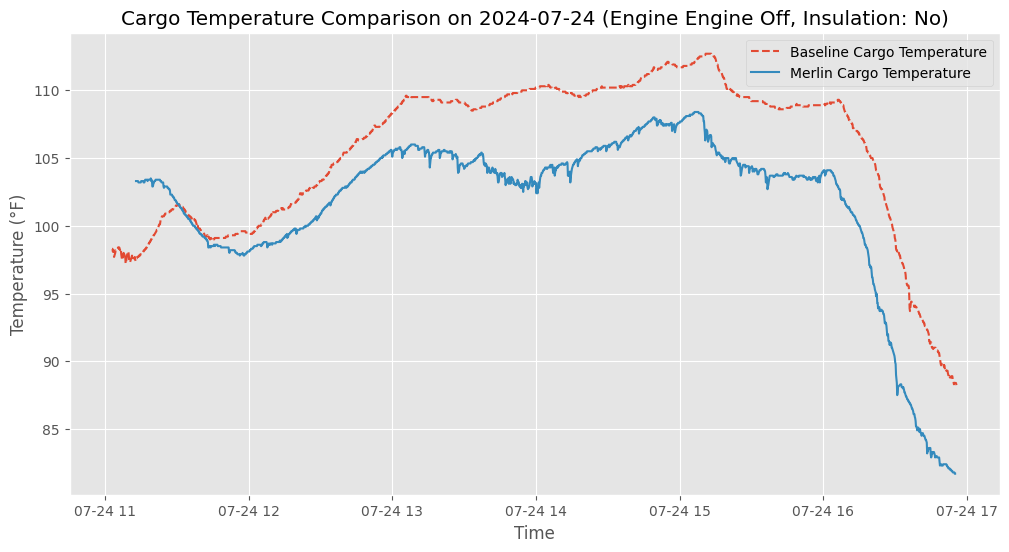

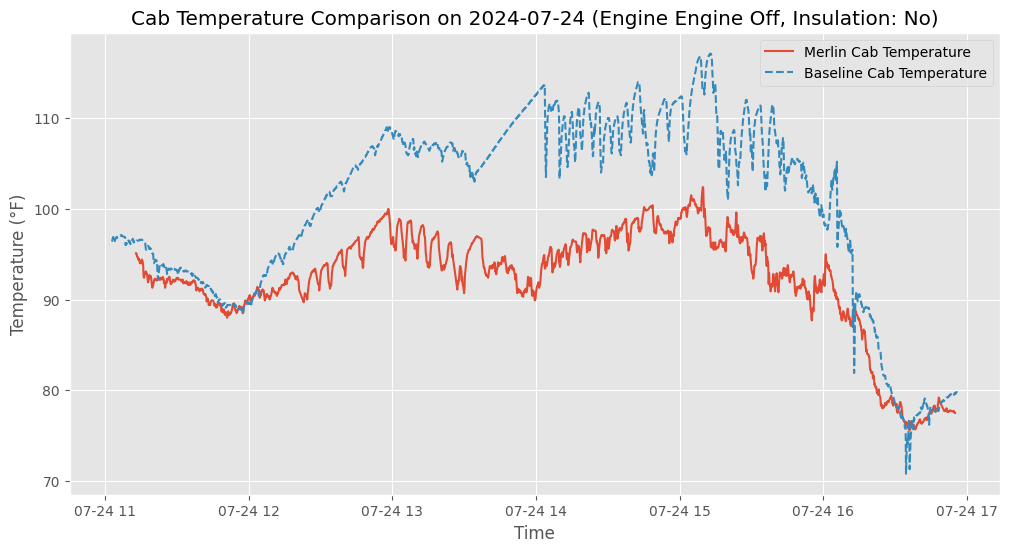

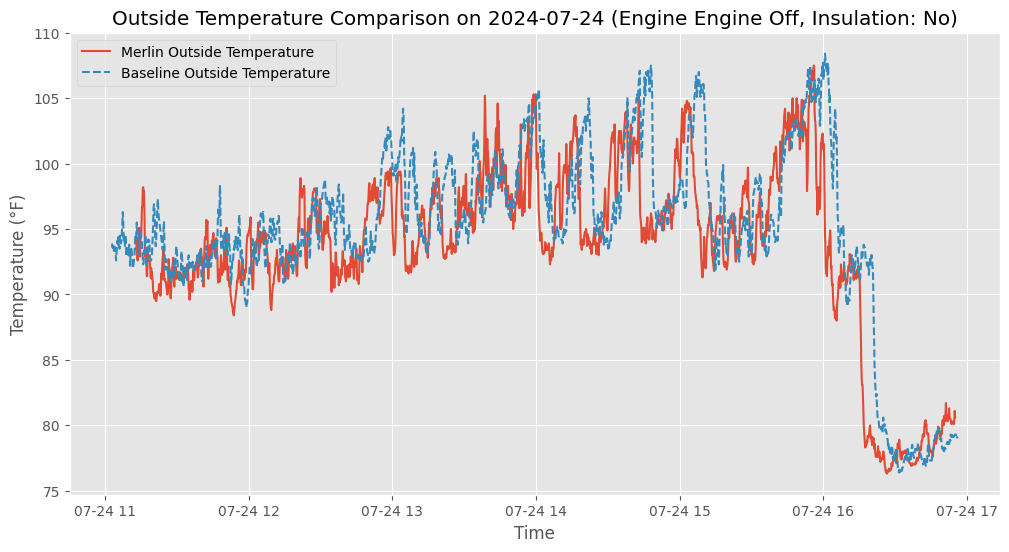

Date: 2024-08-01
Merlin data for 2024-08-01: 12757 records
Baseline data for 2024-08-01: 12952 records
Merlin Condition: Normal, Insulation: Full
Baseline Condition: Normal, Insulation: Roof
Conditions do not match.
No matching data for date 2024-08-01 with conditions Engine Normal, Insulation: Full.
Date: 2024-07-09
Merlin data for 2024-07-09: 7513 records
Baseline data for 2024-07-09: 7807 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.


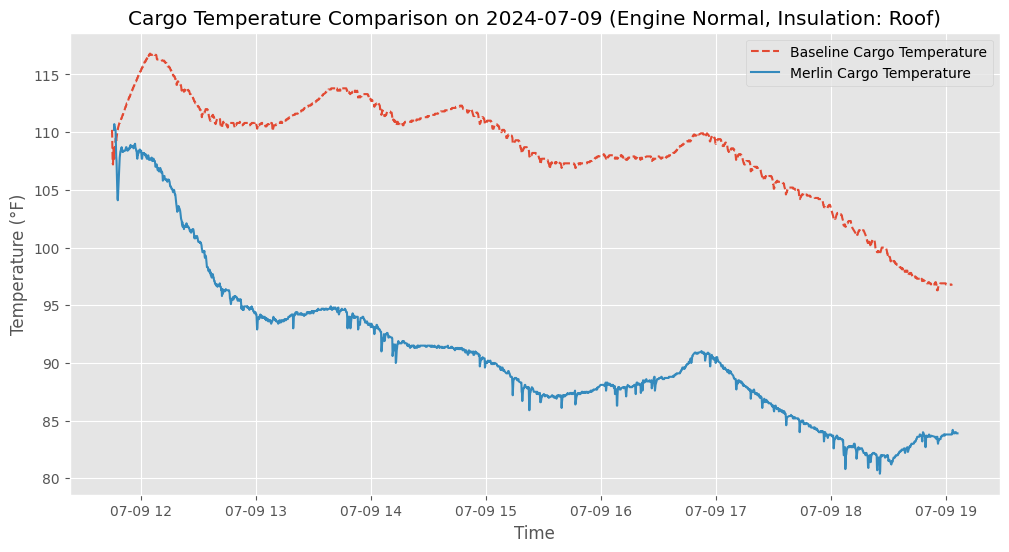

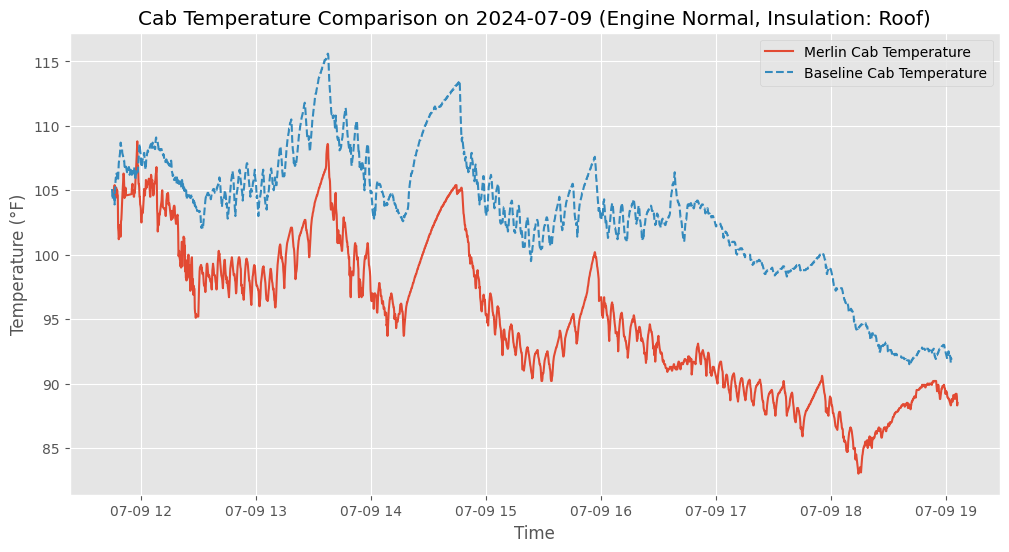

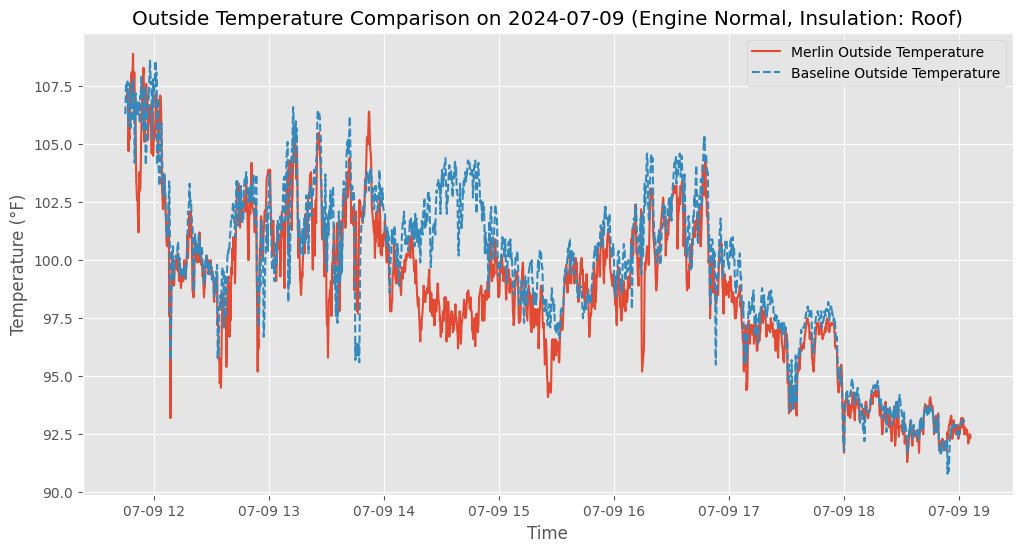

Date: 2024-07-10
Merlin data for 2024-07-10: 6414 records
Baseline data for 2024-07-10: 6380 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.


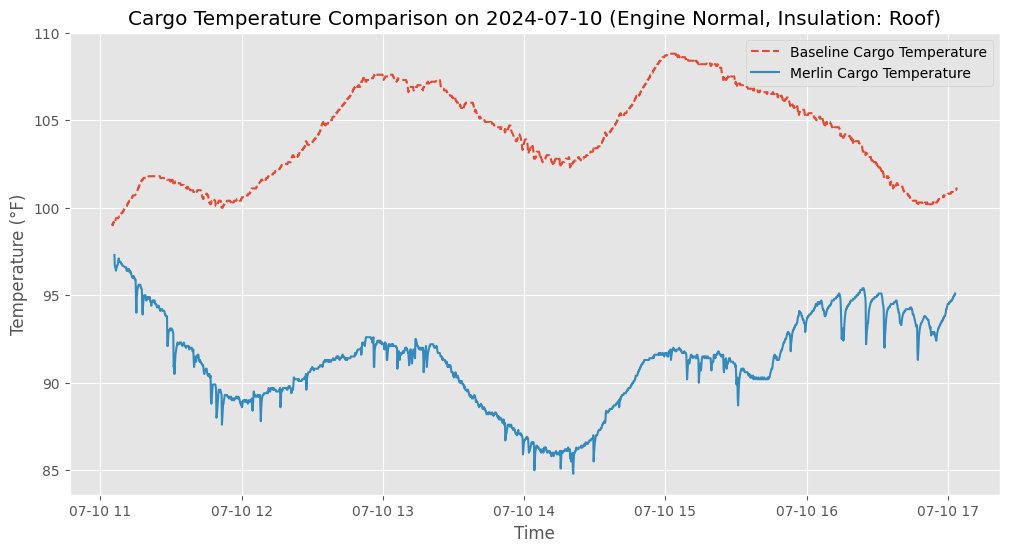

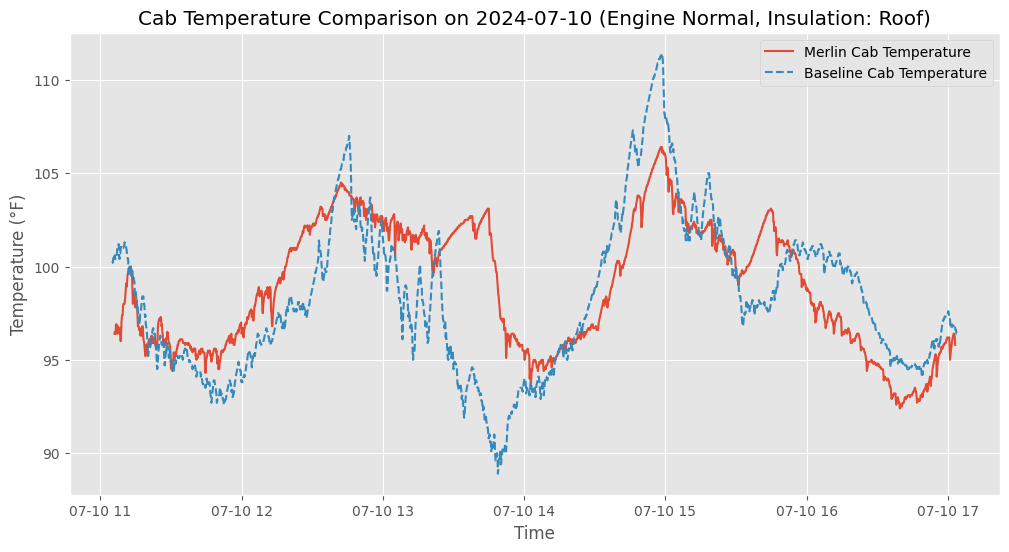

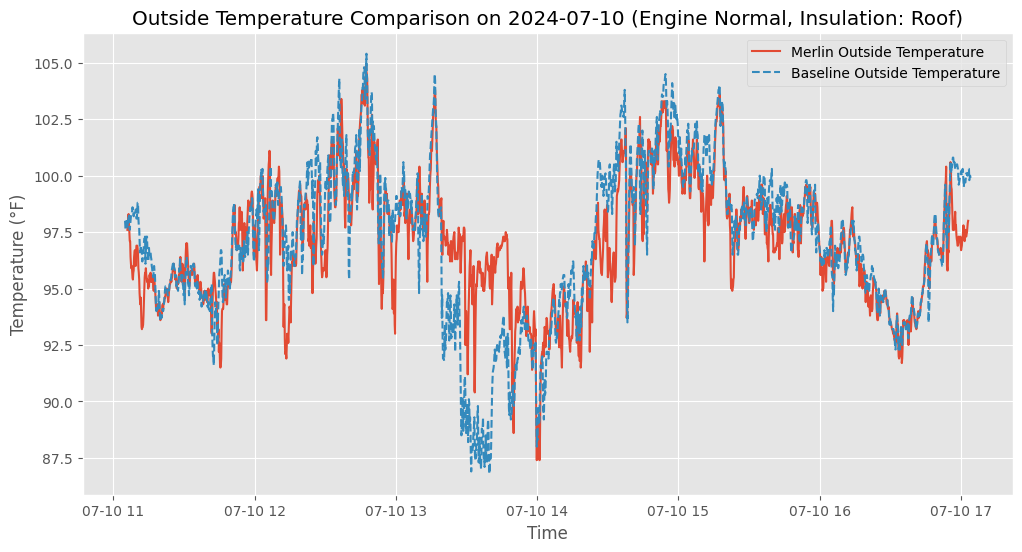

Date: 2024-07-16
Merlin data for 2024-07-16: 5583 records
Baseline data for 2024-07-16: 5797 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.


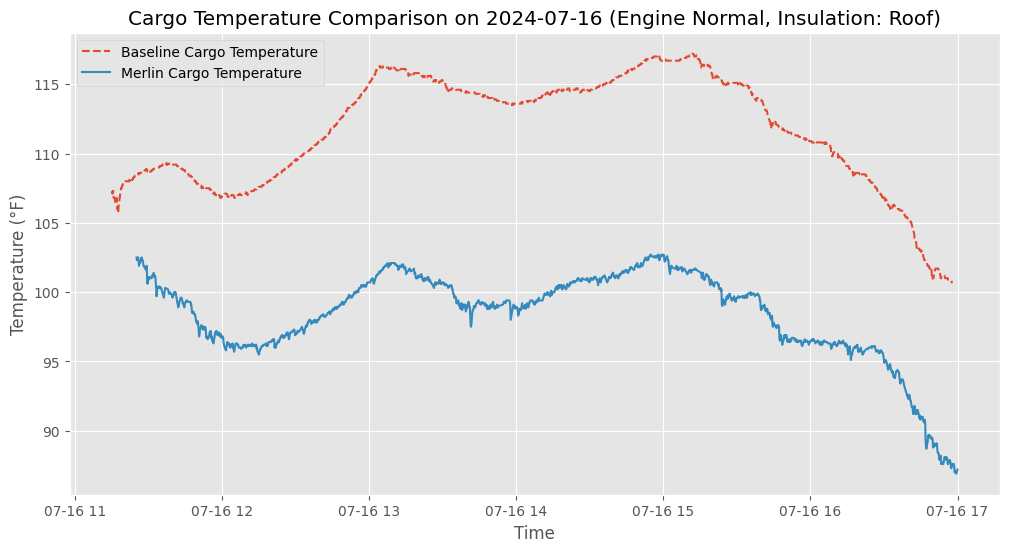

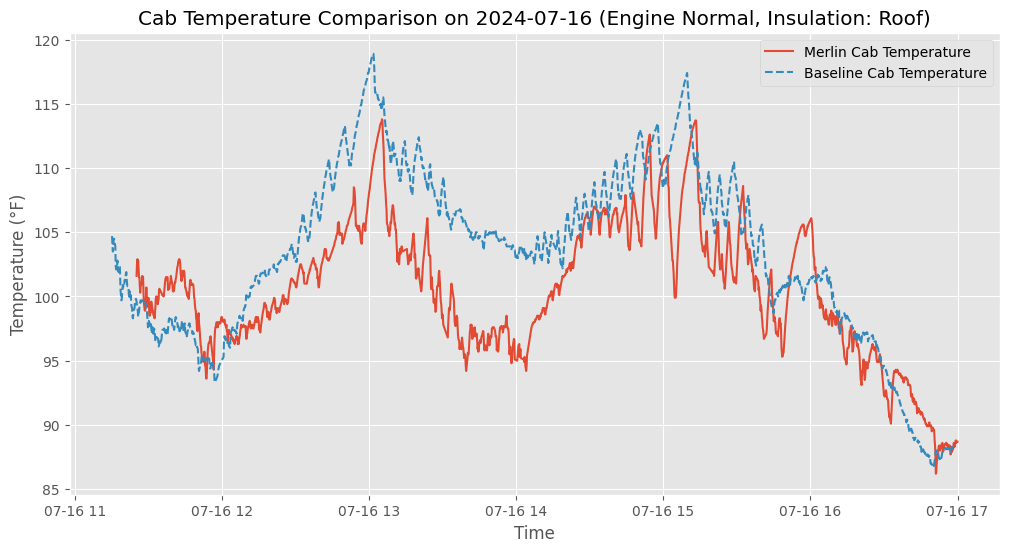

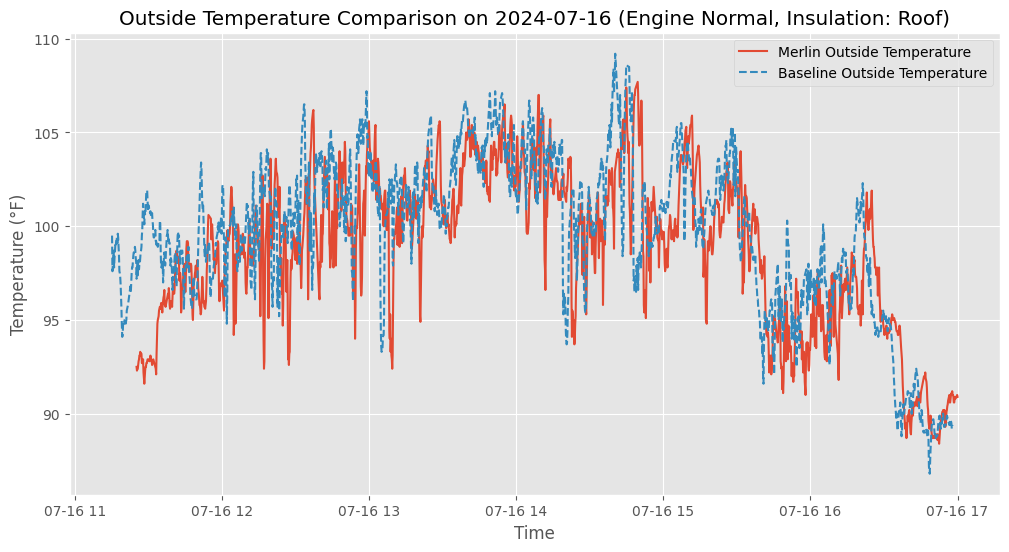

Date: 2024-07-17
Merlin data for 2024-07-17: 5232 records
Baseline data for 2024-07-17: 5311 records
Merlin Condition: Normal, Insulation: Roof
Baseline Condition: Normal, Insulation: Roof
Conditions matched, plotting the data.


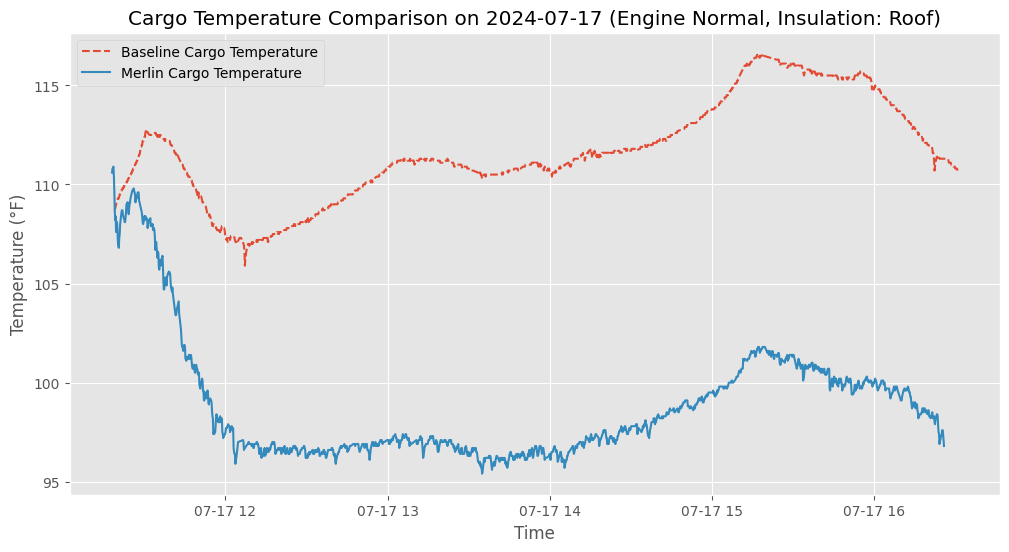

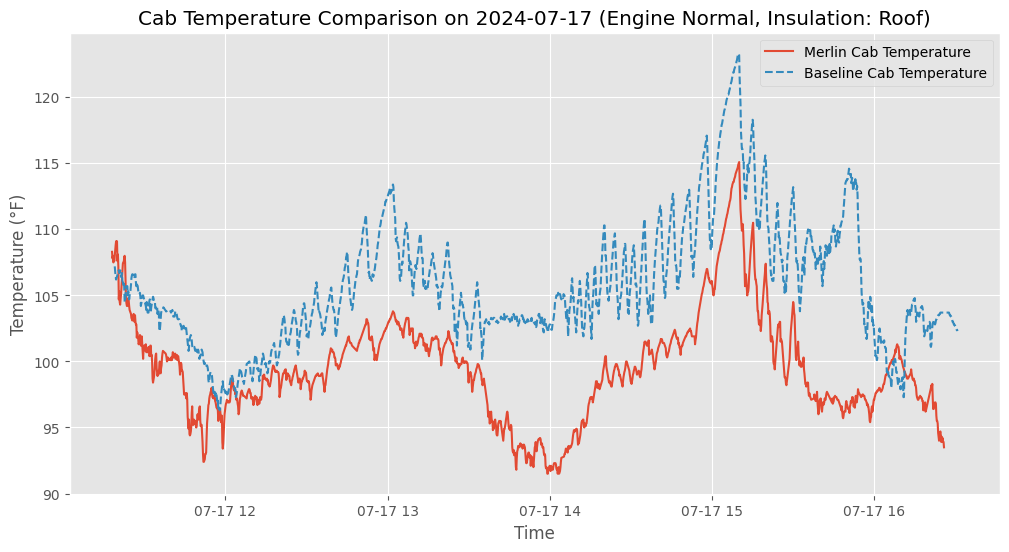

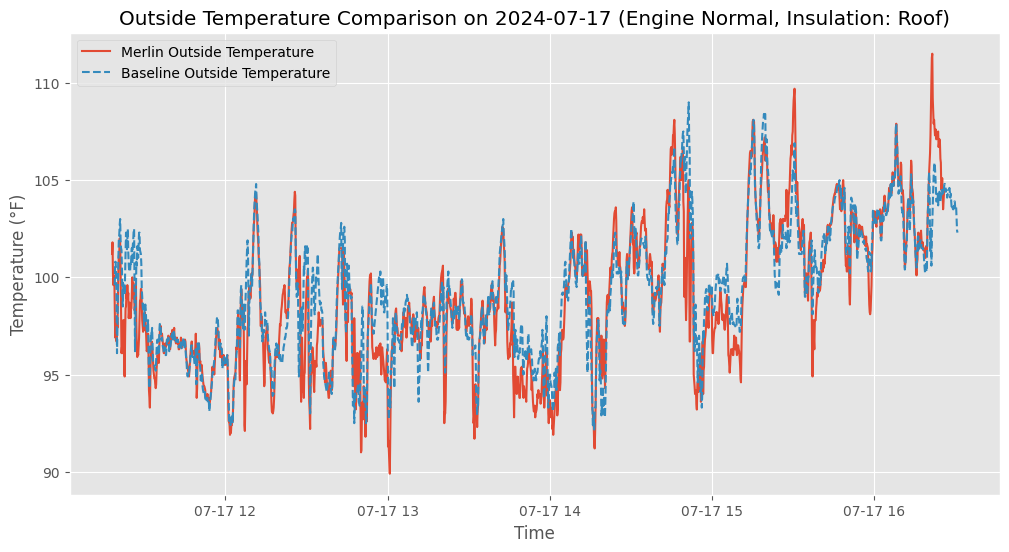

Date: 2024-07-29
Merlin data for 2024-07-29: 5749 records
Baseline data for 2024-07-29: 5884 records
Merlin Condition: Normal, Insulation: Full
Baseline Condition: Normal, Insulation: Roof
Conditions do not match.
No matching data for date 2024-07-29 with conditions Engine Normal, Insulation: Full.


In [28]:
# Load the Excel file
file_path = 'Merlin_DataExport_8_1.xlsx'  # Update with your file path
data = pd.read_excel(file_path, sheet_name='Sheet1')

# Convert the date column to datetime
data['FORMATTED DATE_TIME'] = pd.to_datetime(data['FORMATTED DATE_TIME'])

# Filter the data for Merlin and Base/Baseline technologies
merlin_data = data[data['Technology'].str.contains('Merlin', case=False)]
baseline_data = data[data['Technology'].str.contains('Base', case=False)]

# Define the dates and conditions
cdv_dates = {
    '2024-07-18': ('Engine On', 'No'),
    '2024-07-19': ('Engine Off', 'No'),
    '2024-07-23': ('Engine On', 'No'),
    '2024-07-24': ('Engine Off', 'No'),
    '2024-08-01': ('Normal', 'Full')
}

edv_dates = {
    '2024-07-09': ('Normal', 'Roof'),
    '2024-07-10': ('Normal', 'Roof'),
    '2024-07-16': ('Normal', 'Roof'),
    '2024-07-17': ('Normal', 'Roof'),
    '2024-07-29': ('Normal', 'Full')
}

def plot_temperature_comparison(merlin_data, baseline_data, date, engine_status, insulation):
    # Filter data for the given date
    merlin_daily_data = merlin_data[merlin_data['FORMATTED DATE_TIME'].dt.date == pd.to_datetime(date).date()]
    baseline_daily_data = baseline_data[baseline_data['FORMATTED DATE_TIME'].dt.date == pd.to_datetime(date).date()]
    
    print(f"Date: {date}")
    print(f"Merlin data for {date}: {len(merlin_daily_data)} records")
    print(f"Baseline data for {date}: {len(baseline_daily_data)} records")

    # Initialize empty DataFrames to avoid UnboundLocalError
    merlin_cargo_data, merlin_cab_data, merlin_outside_data = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    baseline_cargo_data, baseline_cab_data, baseline_outside_data = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

    # Check conditions
    if not merlin_daily_data.empty and not baseline_daily_data.empty:
        merlin_condition = merlin_daily_data.iloc[0]['Condition']
        merlin_insulation = merlin_daily_data.iloc[0]['Insulation']
        baseline_condition = baseline_daily_data.iloc[0]['Condition']
        baseline_insulation = baseline_daily_data.iloc[0]['Insulation']
        
        print(f"Merlin Condition: {merlin_condition}, Insulation: {merlin_insulation}")
        print(f"Baseline Condition: {baseline_condition}, Insulation: {baseline_insulation}")
        
        if merlin_condition == engine_status and merlin_insulation == insulation and \
           baseline_condition == engine_status and baseline_insulation == insulation:
            # Separate data by location
            merlin_cargo_data = merlin_daily_data[merlin_daily_data['Location'] == 'Cargo']
            merlin_cab_data = merlin_daily_data[merlin_daily_data['Location'] == 'Cab']
            merlin_outside_data = merlin_daily_data[merlin_daily_data['Location'] == 'Out']
            
            baseline_cargo_data = baseline_daily_data[baseline_daily_data['Location'] == 'Cargo']
            baseline_cab_data = baseline_daily_data[baseline_daily_data['Location'] == 'Cab']
            baseline_outside_data = baseline_daily_data[baseline_daily_data['Location'] == 'Out']
            
            print("Conditions matched, plotting the data.")
        else:
            print("Conditions do not match.")

    # Plot the data if the conditions match
    if not merlin_cargo_data.empty and not baseline_cargo_data.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(baseline_cargo_data['FORMATTED DATE_TIME'], baseline_cargo_data['Temperature'], label='Baseline Cargo Temperature', linestyle='--')
        plt.plot(merlin_cargo_data['FORMATTED DATE_TIME'], merlin_cargo_data['Temperature'], label='Merlin Cargo Temperature', linestyle='-')
        
        plt.title(f'Cargo Temperature Comparison on {date} (Engine {engine_status}, Insulation: {insulation})')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°F)')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'august_1/Cargo_temperature_plot_{date}.png')
        plt.show()
    
    if not merlin_cab_data.empty and not baseline_cab_data.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(merlin_cab_data['FORMATTED DATE_TIME'], merlin_cab_data['Temperature'], label='Merlin Cab Temperature', linestyle='-')
        plt.plot(baseline_cab_data['FORMATTED DATE_TIME'], baseline_cab_data['Temperature'], label='Baseline Cab Temperature', linestyle='--')
        
        plt.title(f'Cab Temperature Comparison on {date} (Engine {engine_status}, Insulation: {insulation})')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°F)')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'august_1/Cab_temperature_plot_{date}.png')
        plt.show()
    
    if not merlin_outside_data.empty and not baseline_outside_data.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(merlin_outside_data['FORMATTED DATE_TIME'], merlin_outside_data['Temperature'], label='Merlin Outside Temperature', linestyle='-')
        plt.plot(baseline_outside_data['FORMATTED DATE_TIME'], baseline_outside_data['Temperature'], label='Baseline Outside Temperature', linestyle='--')
        
        plt.title(f'Outside Temperature Comparison on {date} (Engine {engine_status}, Insulation: {insulation})')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°F)')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'august_1/outside_temperature_plot_{date}.png')
        plt.show()
    else:
        print(f"No matching data for date {date} with conditions Engine {engine_status}, Insulation: {insulation}.")

# Plot for CDV dates
for date, (engine_status, insulation) in cdv_dates.items():
    plot_temperature_comparison(merlin_data, baseline_data, date, engine_status, insulation)

# Plot for EDV dates
for date, (engine_status, insulation) in edv_dates.items():
    plot_temperature_comparison(merlin_data, baseline_data, date, engine_status, insulation)
